# Laboratorio 2

## Funciones, iteraciones, condiciones de parada y memoria dinámica

In [34]:
%%file lab2.c

#include <math.h>
#include <stdio.h>
#include <stdlib.h>

double s_formula(double ra){
    return (ra / (1 - ra));
}

double s_for(int cant_terms, double* terms){
    double s = 0;
    for(int i = 0; i < cant_terms; i++){
        s += 1 / (pow(2.0, (double)(i+1)));
        terms[i] = s;
    }
    return s;
}

double s_while_1(double ref, double cota, double tol, int max_iter){
    double s = 0;
    int i = 0;
    double term = 0.0;
    double eps = 0.0;
    while( 1 ){
        term = 1 / (pow(2.0, (double)(i+1)));

        if (term < cota){
            break;
        }

        s += term;

        eps = fabs(ref - s) / ref;

        if (eps < tol) {
            break;
        }

        i++;

        if (i > max_iter){
            break;
        }
    }
    return s;
}

double s_while_2(double tol, int max_iter){
    double s = 0;
    int i = 0;
    double eps = 1.0;
    double s_ant = 0.0;
    while( 1 ){ 
        s += 1 / (pow(2.0, (double)(i+1)));

        if (i > 0){
            eps = fabs(s_ant - s) / s_ant;
        }

        if (eps < tol) {
            break;
        }

        s_ant = s;

        i++;

        if (i > max_iter){
            break;
        }
    }
    return s;
}

void print_terms(int N, double* terms){
    printf("%lf\t%lf\t%lf\t%lf\n", terms[N-4], terms[N-3], terms[N-2], terms[N-1]);
}

int main(){
    
    double ref = s_formula(0.5);
    double tol = 1e-4;

    int cant_terms = 8;
    double* for_terms = (double*)malloc(sizeof(double)*cant_terms);

    printf("ref:%lf\n", ref);
    printf("s_for:%lf\n", s_for(cant_terms, for_terms));
    print_terms(cant_terms, for_terms);
    printf("s_while_1:%lf\n", s_while_1(ref, 0.005, tol, 10));
    printf("s_while_2:%lf\n", s_while_2(tol, 10));
    return 0;
}

Overwriting lab2.c


In [35]:
! gcc lab2.c -o lab2 -lm

In [36]:
! ./lab2

ref:1.000000
s_for:0.996094
0.968750	0.984375	0.992188	0.996094
s_while_1:0.992188
s_while_2:0.999512


In [45]:
def s_for(cant_terms):
  s = 0
  l = []
  for i in range(cant_terms):
    s += 1.0 / (2.0 ** (i + 1))
    l.append(s)
  return s, l

In [53]:
s, l = s_for(5)

In [56]:
import matplotlib.pyplot as plt

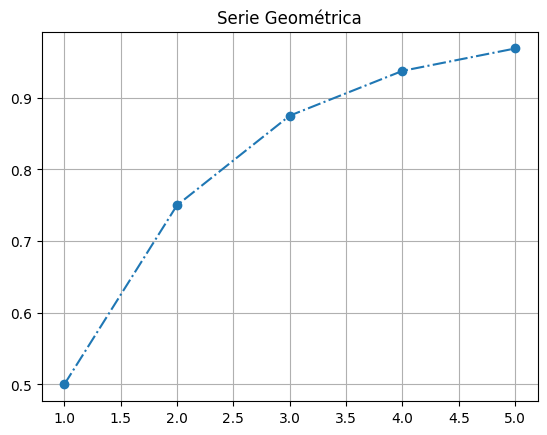

In [63]:
plt.plot([1,2,3,4,5], l, '-.o')
plt.title('Serie Geométrica')
plt.grid(True)